In this work, we are going to be considering predicting the risk of diabetes among Men and Women of diffrent ages. Diabetes.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. There is class imbalance in the dataset. This dataset has 21 feature variables.

The goal of this project is to examine Logistics regression model and it performance in classifiying whether an individual has diabetes or not.

In [3]:
#importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick



In [4]:
from google.colab import files
# Using the files.upload() function to upload the dataset file
uploaded = files.upload()

Saving Diabetes.csv to Diabetes.csv


The Data

The dataset was sourced from kaggle and in three parts.

df1: dataset with data from patients without diabetes, pre-diabetes and diabetes.

df2: balanced patients with and without diabetes.

df3: imbalanced dataset of patients with and without diabetes.

This project will be mainly on the last 2, where we will explore df3 imbalanced and large dataset to understand the features and target relationship. We will use this information to predict patients in balanced dataset df2.

In [5]:
from google.colab import files
uploaded =files.upload()

Saving diabetes2.csv to diabetes2.csv


In [6]:
from google.colab import files
uploaded =files.upload()

Saving diabetes3.csv to diabetes3.csv


In [7]:
#reading the uploaded dataset into a dataframe
diabetes2 = pd.read_csv('diabetes2.csv')

In [8]:
#reading the uploaded dataset into a dataframe
diabetes3 = pd.read_csv('diabetes3.csv')

In [9]:
#To get the shape of the dataframe.
print('diabetes2 shape is: {}'.format(diabetes2.shape))
print('diabetes3 shape is: {}'.format(diabetes3.shape))

diabetes2 shape is: (70692, 22)
diabetes3 shape is: (253680, 22)


We are going to have a quick look at the dataset before cleaning it up.

In [10]:
diabetes3.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [12]:
diabetes3.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,253680.0,0.139333,0.346294,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [13]:
diabetes3.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

Now we are about to start the cleaning process of the dataset, and will we start by checking for missing values, before moving to duplicates values, and the rest.

In [14]:
diabetes3.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

No missing data in the dataset. so we head on to finding if their are any duplicate values.

In [15]:
#check for duplicates rows, and show the first 5 rows duplicated.
duplicates = diabetes3[diabetes3.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  24206


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,1.0,1.0,1.0,1.0,27.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,10.0,4.0,5.0
1563,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
2700,0.0,0.0,0.0,1.0,32.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,5.0,6.0,8.0
3160,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,6.0,8.0
3332,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0


In [16]:
diabetes3 = diabetes3.drop_duplicates()

print (diabetes3)

        Diabetes_binary  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   
...                 ...     ...       ...        ...   ...     ...     ...   
253675              0.0     1.0       1.0        1.0  45.0     0.0     0.0   
253676              1.0     1.0       1.0        1.0  18.0     0.0     0.0   
253677              0.0     0.0       0.0        1.0  28.0     0.0     0.0   
253678              0.0     1.0       0.0        1.0  23.0     0.0     0.0   
253679              1.0     1.0       1.0        1.0  25.0     0.0     0.0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHea

After dataset cleanup

In [17]:
diabetes3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       229474 non-null  float64
 1   HighBP                229474 non-null  float64
 2   HighChol              229474 non-null  float64
 3   CholCheck             229474 non-null  float64
 4   BMI                   229474 non-null  float64
 5   Smoker                229474 non-null  float64
 6   Stroke                229474 non-null  float64
 7   HeartDiseaseorAttack  229474 non-null  float64
 8   PhysActivity          229474 non-null  float64
 9   Fruits                229474 non-null  float64
 10  Veggies               229474 non-null  float64
 11  HvyAlcoholConsump     229474 non-null  float64
 12  AnyHealthcare         229474 non-null  float64
 13  NoDocbcCost           229474 non-null  float64
 14  GenHlth               229474 non-null  float64
 15  

1.0     35097
0.0    194377
Name: Diabetes_binary, dtype: int64
1.0    15.294543%
0.0    84.705457%
Name: Diabetes_binary, dtype: object



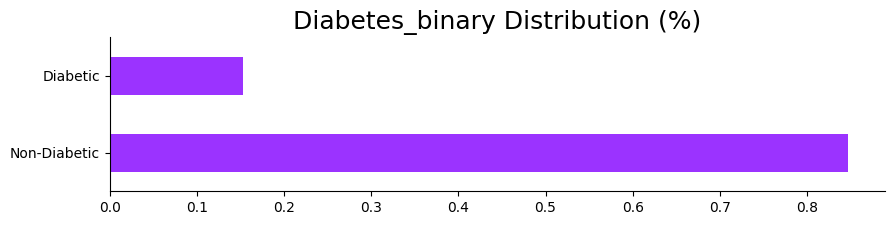

In [33]:
#Data Exploration The aim of this is to visualized the diabetic and non-diabetic patients.
#In this dataset, we have more of non-diabetic patient(85%) to diabetic patients(15%). which shows that the dataset is inbalance.

colors = ['#9B33FF']
print(diabetes3['Diabetes_binary'].value_counts(ascending=True))
print(diabetes3['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
diabetes3['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2),color=colors).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

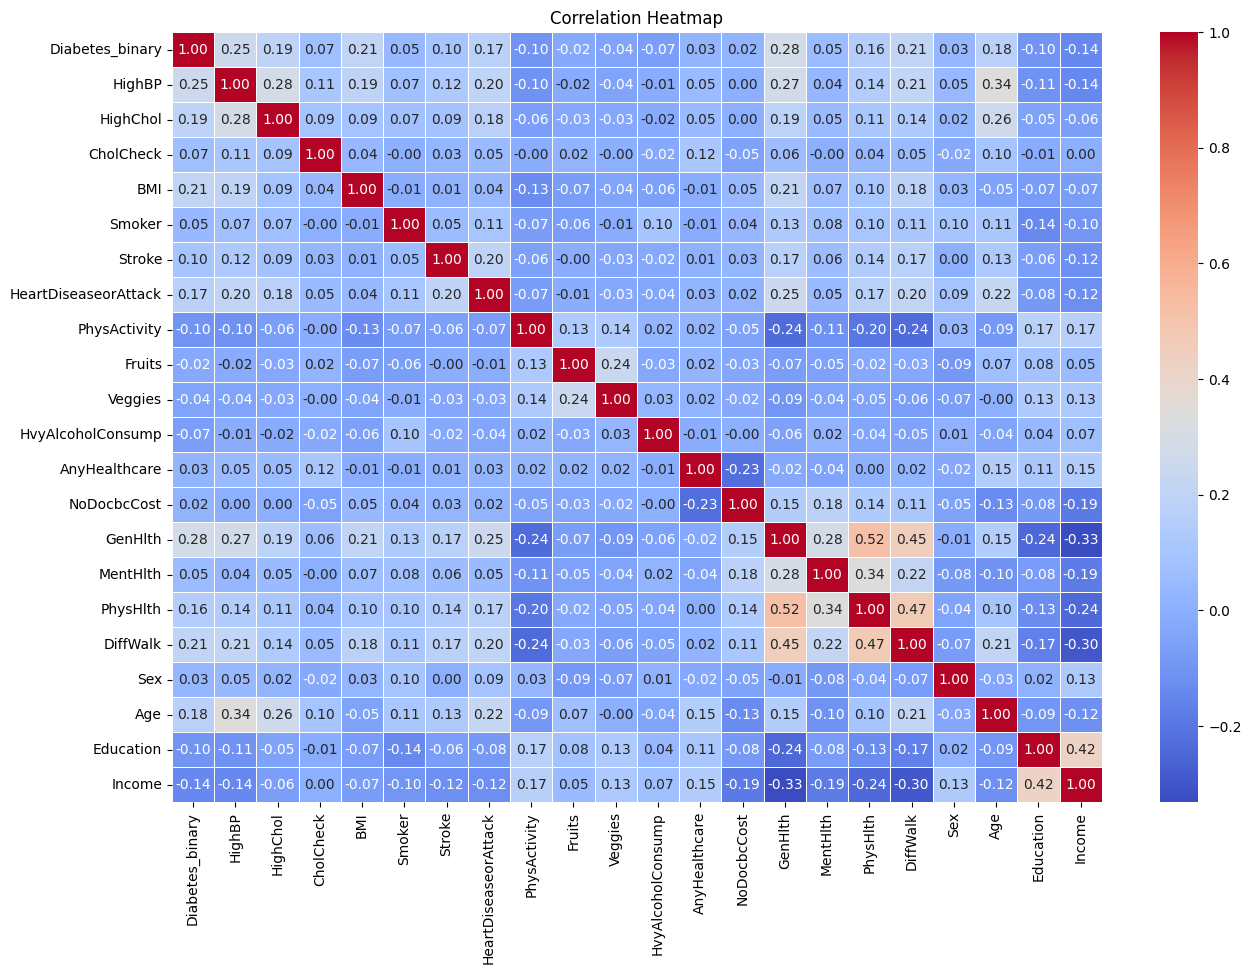

In [24]:
#To get the correlation of all the columns in the dataset
correlation_matrix = diabetes3.corr()

# Set the figure size
plt.figure(figsize=(15, 10))

# Create a heatmap using the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Strong Correlations:

Variables Physical Health and General Health correlated positivily

The analysis revealed a significant positive correlation between the Physical Health and General Health variables, suggesting that General Health may be a composite measure comprising Physical Health totaled and other related factors.

Variables Income and General Health correlated negativily, the analysis indicated a negative correlation between Income and General Health, implying that individuals with lower incomes may experience limited access to private medical care, potentially leading to negative impacts on their overall health outcomes.

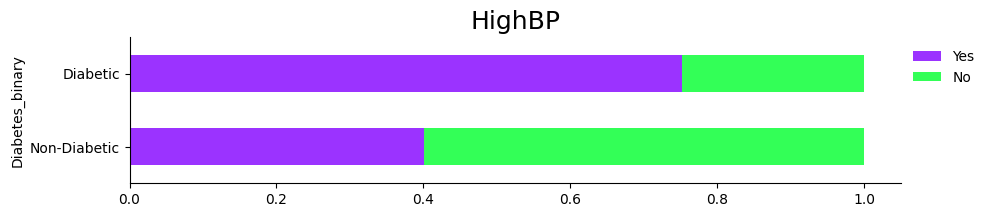

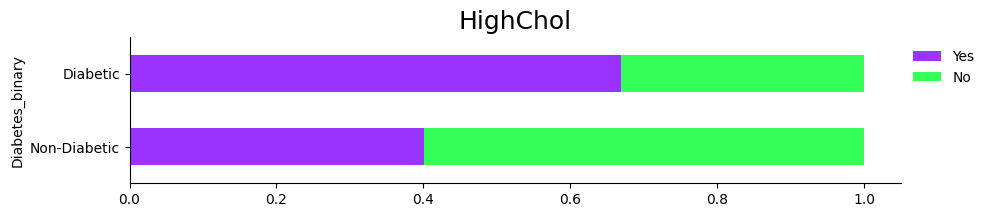

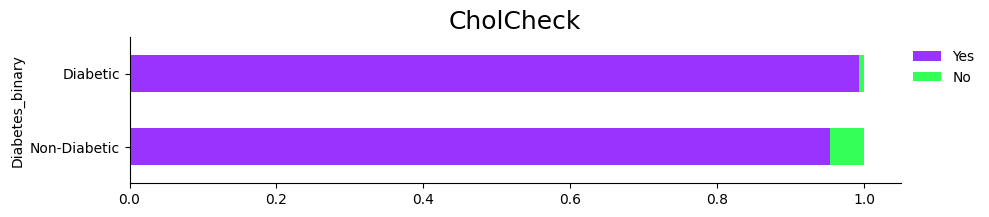

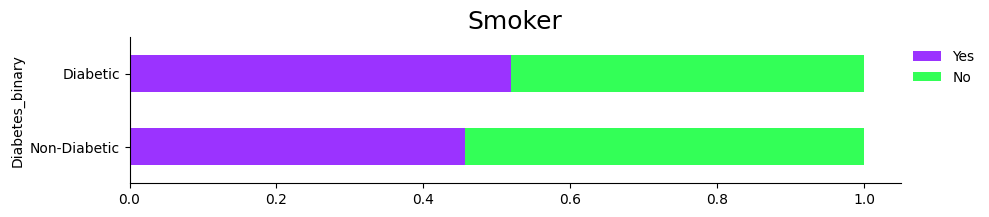

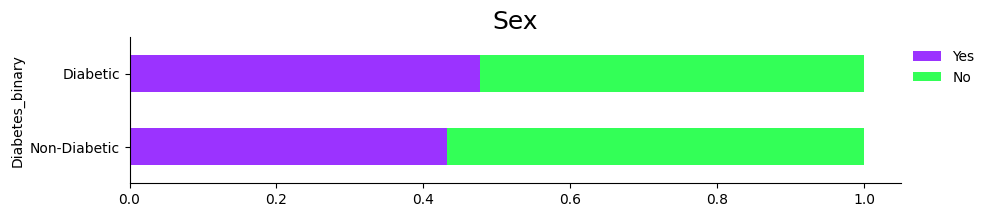

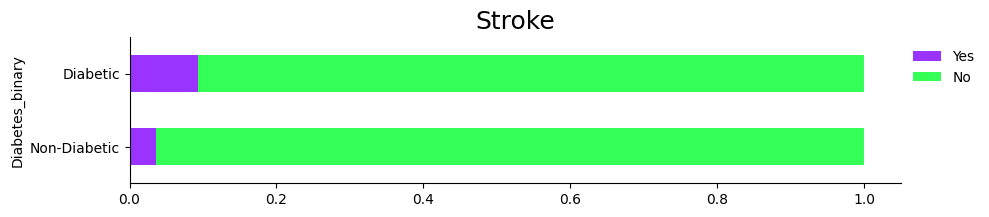

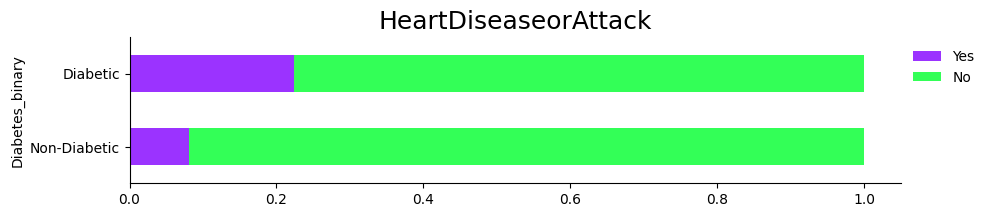

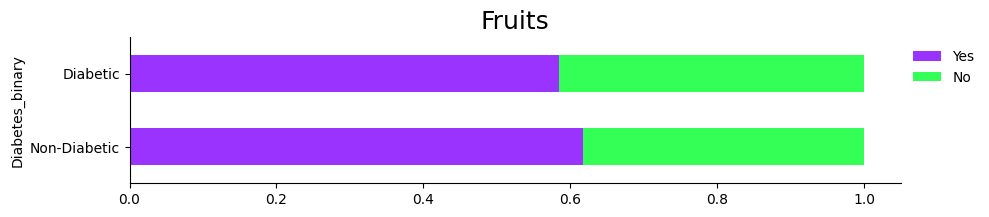

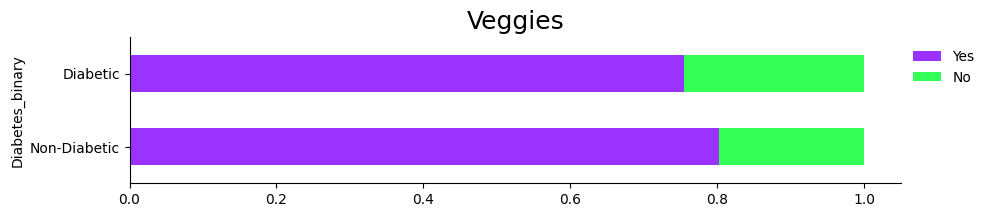

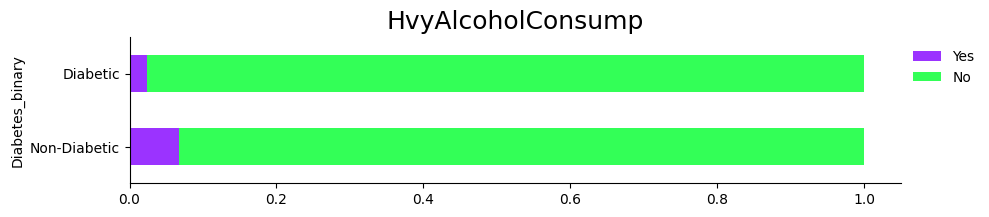

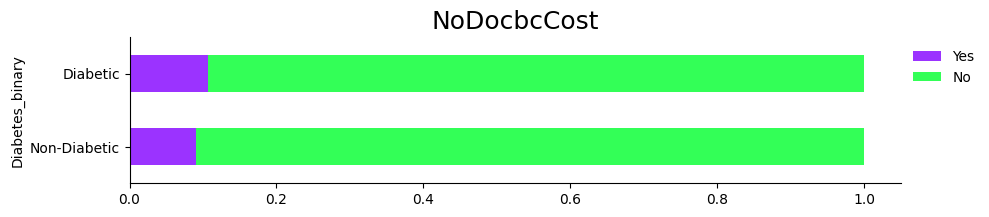

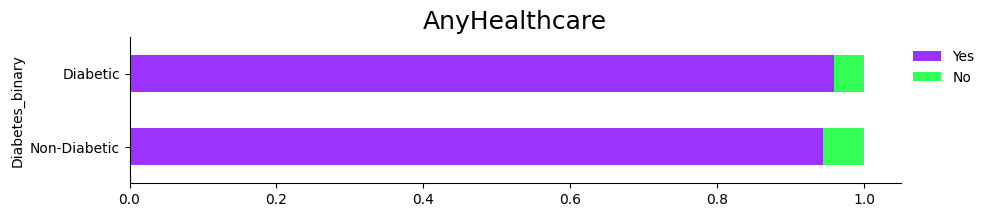

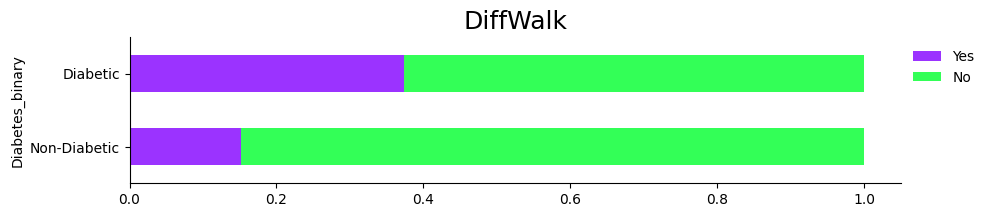

In [28]:
#Categorical Variables exploration. Each of the feature shows if a patient is liable to being diabetic or not.
colors = ['#9B33FF','#33FF57']

bool_vars = ['HighBP','HighChol','CholCheck','Smoker','Sex','Stroke','HeartDiseaseorAttack','Fruits','Veggies','HvyAlcoholConsump','NoDocbcCost','AnyHealthcare','DiffWalk']
def analyse_cat(var):
    (diabetes3.groupby('Diabetes_binary')[var]
     .value_counts(1)
     .unstack()
     .iloc[:,::-1]
     .plot(kind='barh', stacked=True, figsize=(10, 2), color=colors, alpha=1)
     .spines[['top', 'right']].set_visible(False))
    plt.legend(['Yes', "No"], bbox_to_anchor=(1, 1, 0, 0), shadow=False, frameon=False)
    plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic'])
    plt.tight_layout()
    plt.title(var, fontsize=18)
    plt.show()

for var in bool_vars:
    analyse_cat(var)

In the representation above, please note that for the Sex, Yes= Male, No=Female.

In [30]:
#Numeric Non-binary variable
num_vars = ['BMI','GenHlth','Age','MentHlth','PhysHlth','Education','Income']

diabetes3[num_vars].describe()

,BMI,GenHlth,Age,MentHlth,PhysHlth,Education,Income
count,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000,229474.000000
mean,28.687507,2.601820,8.085068,3.509866,4.681219,4.979741,5.888615
std,6.789204,1.064962,3.094451,7.717643,9.050877,0.992989,2.092888
min,12.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,2.000000,6.000000,0.000000,0.000000,4.000000,4.000000
50%,27.000000,3.000000,8.000000,0.000000,0.000000,5.000000,6.000000
75%,32.000000,3.000000,10.000000,2.000000,4.000000,6.000000,8.000000
max,98.000000,5.000000,13.000000,30.000000,30.000000,6.000000,8.000000


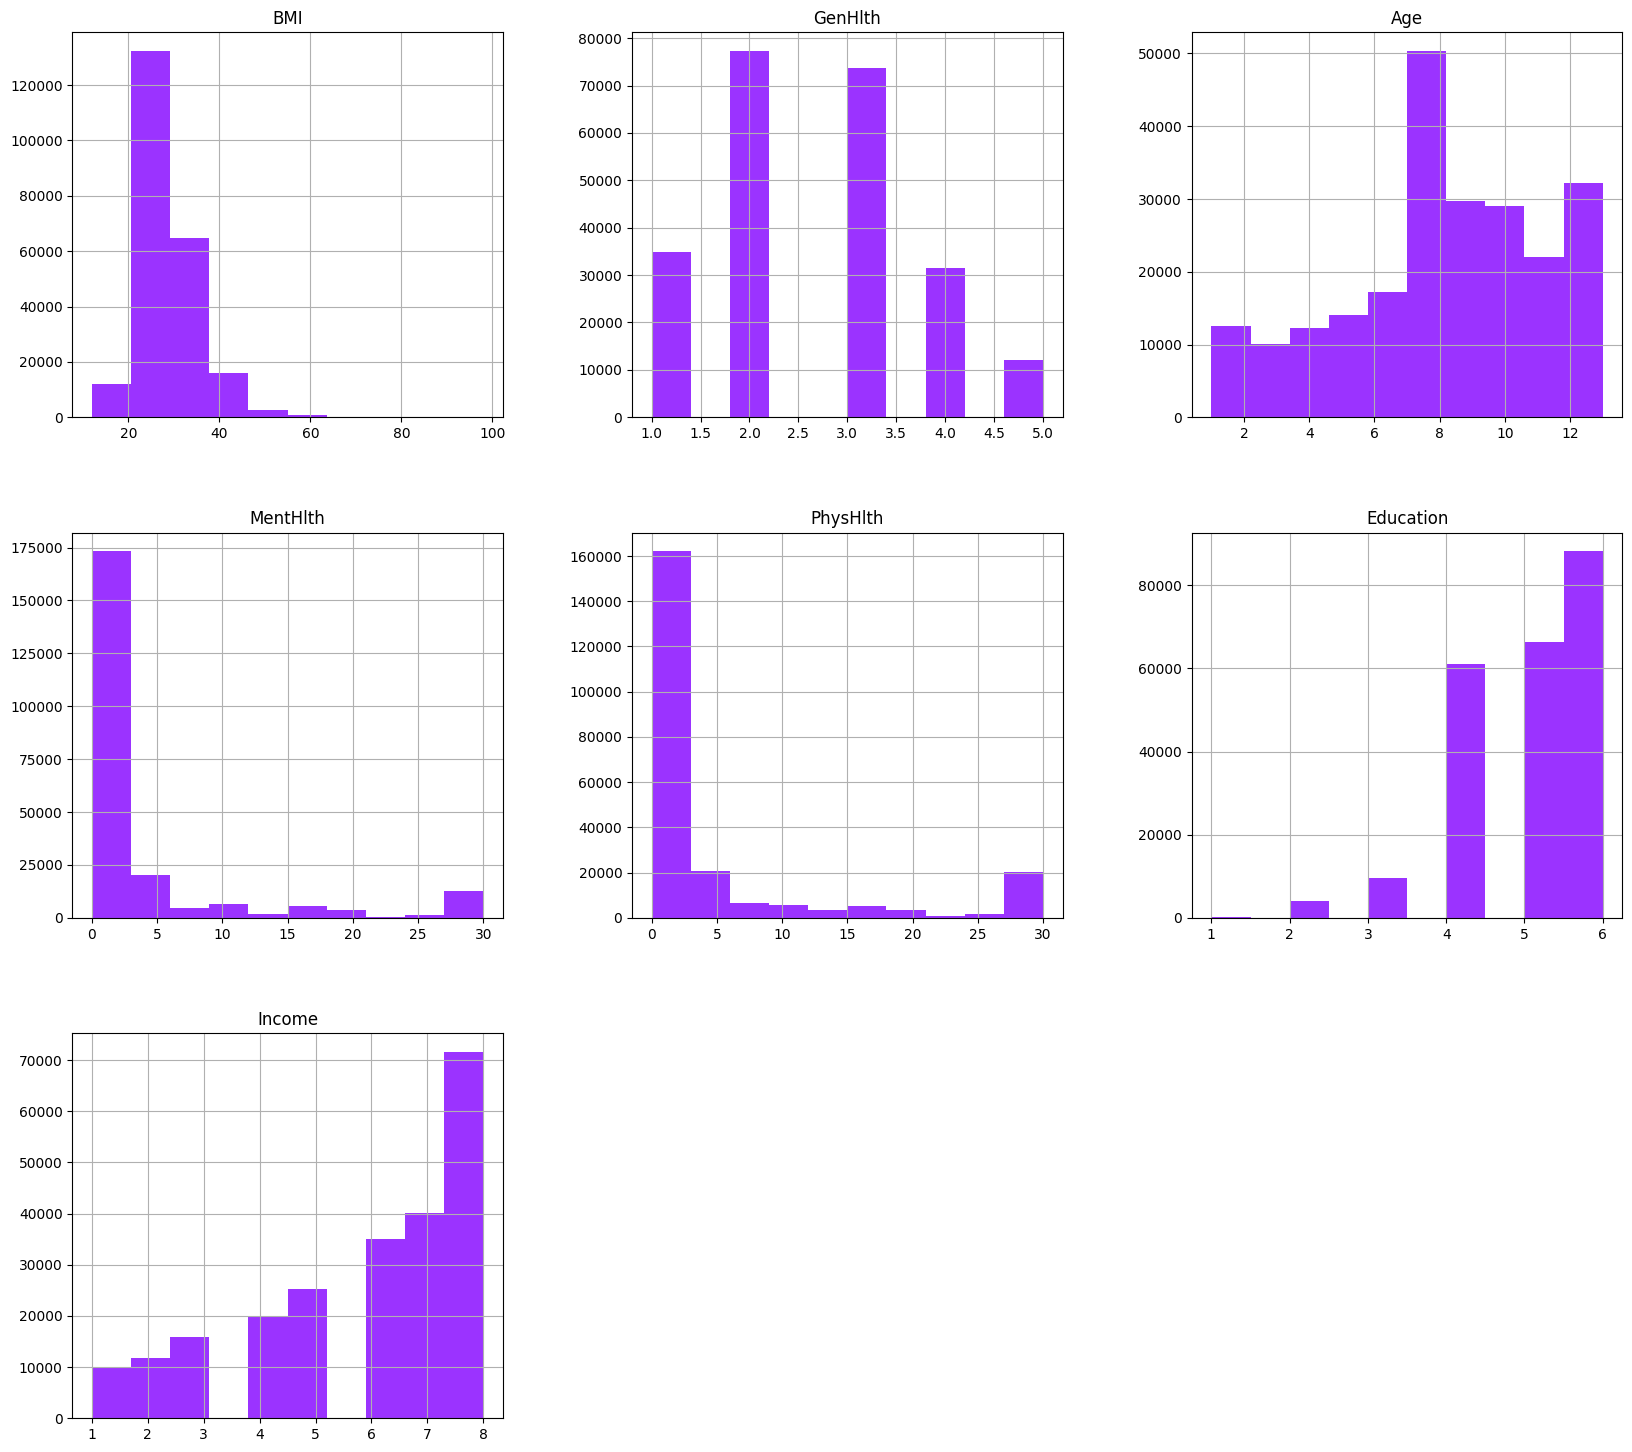

In [32]:
colors = ['#9B33FF']
diabetes3[num_vars].hist(figsize=(20,18), color=colors);

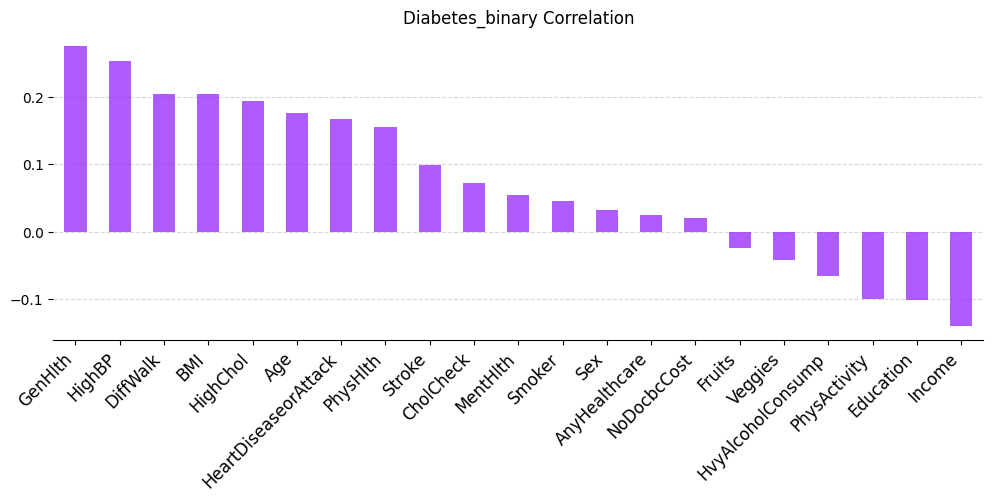

In [35]:
#Correlation with target (diabetic binary)
colors =['#9B33FF']
(diabetes3.drop('Diabetes_binary', axis=1)
   .corrwith(diabetes3.Diabetes_binary)
   .sort_values(ascending=False)
   .plot(kind='bar', figsize=(12, 4), title="Diabetes_binary Correlation", color=colors, alpha=0.8, zorder=3)
   .spines[['top','right', 'left']].set_visible(False)
   )
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.xticks(rotation = 45, ha='right', size=12);

from the above graph, we can see the variables which has high and low correlation with the target variable which diabetes_binary. It is listed as follows:
GenHlth
HighBP
DiffWalk
BMI
HighChol
Age
HeartDiseaseorAttack
PhysHlth
Physactivity
Education
Income

Weak correlation with Diabetes_binary are:
AnyHealthcare
NoDocbcCost
Fruits
Sex
Smoker
Veggies

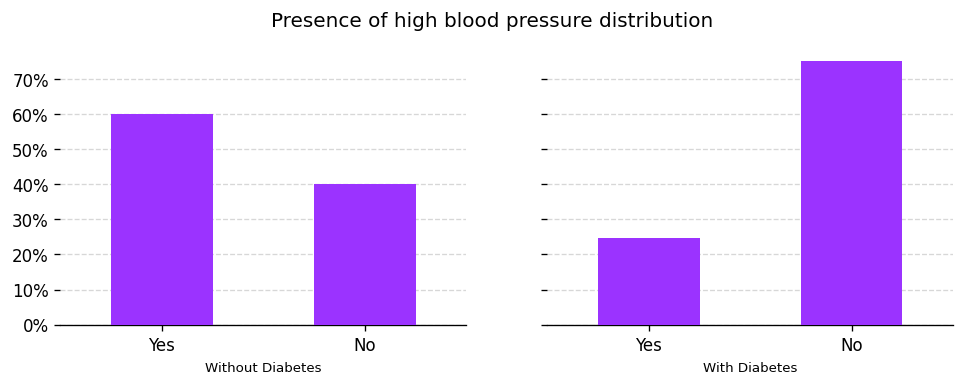

In [39]:
#To find the correlation between HBP and Diabetes
colors=['#9B33FF']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Presence of high blood pressure distribution')

(diabetes3[diabetes3['Diabetes_binary']==False]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["Yes", 'No'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['HighBP']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["Yes", 'No'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly greater incidence of hypertension compared to those without the condition.

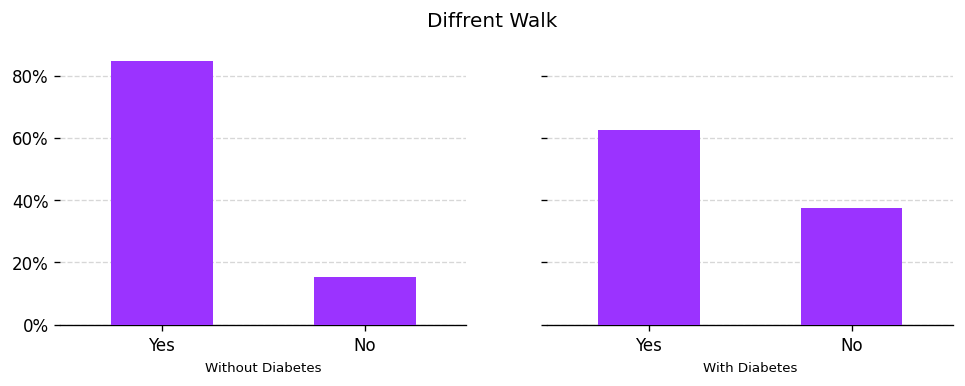

In [46]:
colors=['#9B33FF']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Diffrent Walk')

(diabetes3[diabetes3['Diabetes_binary']==False]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["Yes", 'No'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['DiffWalk']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["Yes", 'No'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly greater difficulty walking compared to those without the condition


BMI

Body Mass Index (BMI) is a measure of body fat based on a person's weight and height. It is calculated by dividing a person's weight in kilograms by the square of their height in meters (kg/m²).

BMI= Weight(kg) / height(m²)

BMI provides an estimation of the amount of body fat a person has, and is commonly used as a screening tool to identify individuals who may be at a higher risk for weight-related health problems, such as diabetes, heart disease, and certain types of cancer.

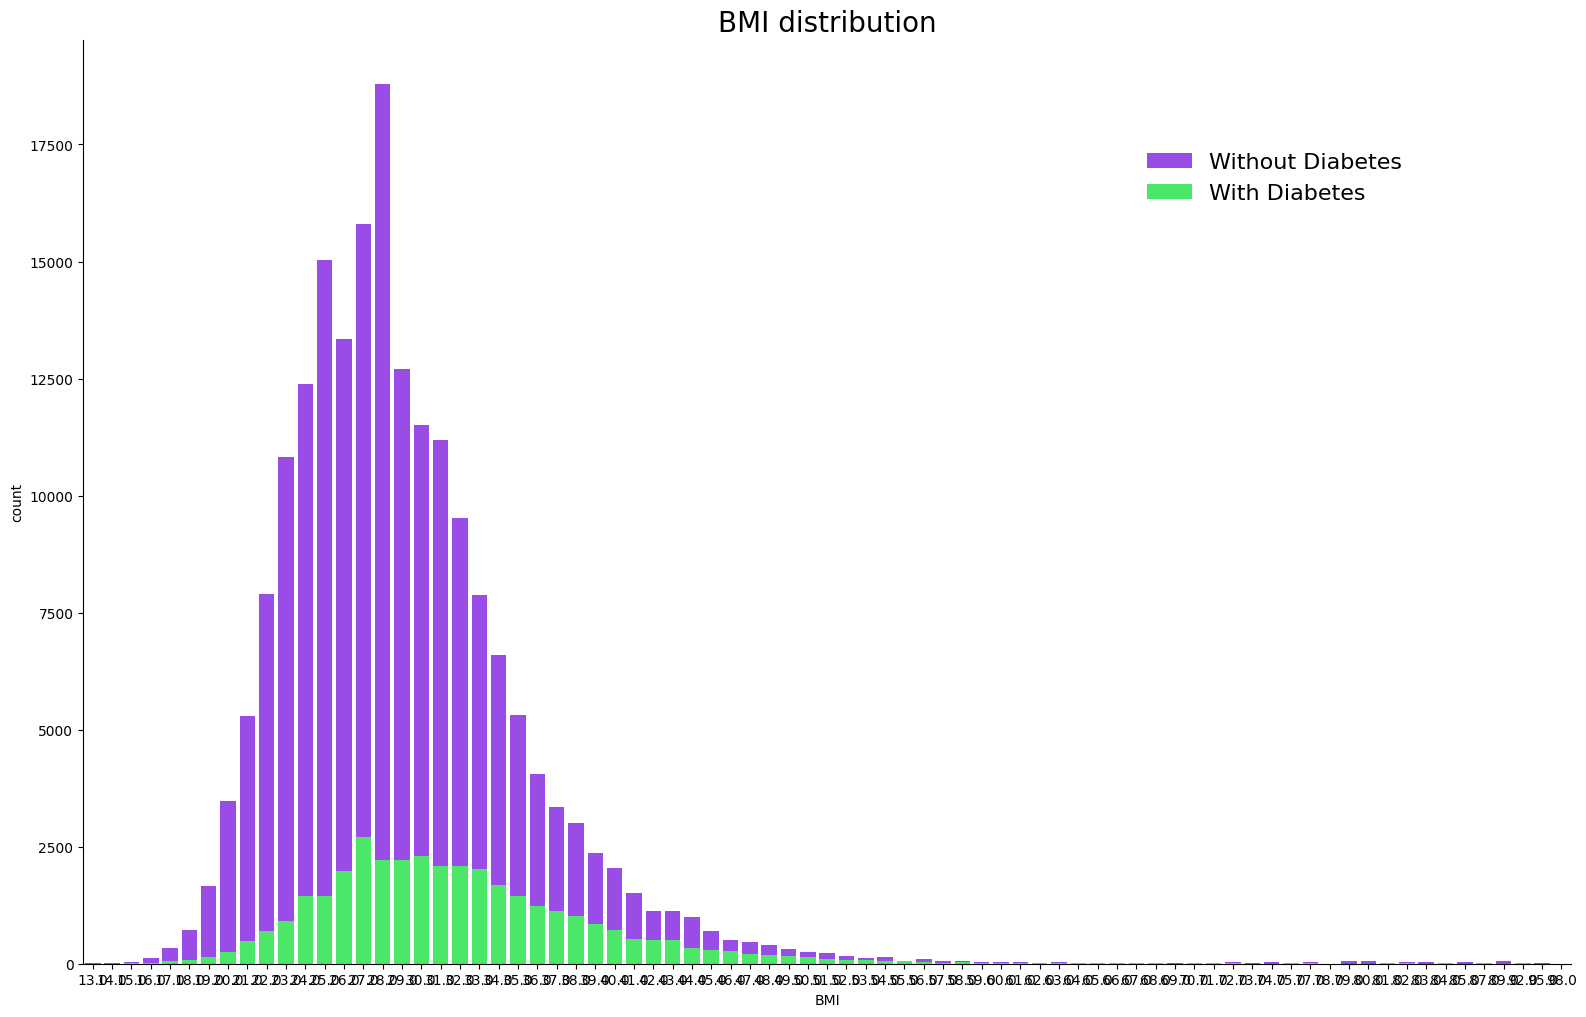

In [44]:
#BMI
ratio = 12
plt.figure(figsize=(ratio*1.6, ratio))
colors = ['#9B33FF', '#33FF57']

sns.countplot(x=diabetes3[diabetes3['Diabetes_binary'] == False]['BMI'], color=colors[0], label="Without Diabetes")
sns.countplot(x=diabetes3[diabetes3['Diabetes_binary'] == True]['BMI'], color=colors[1], label="With Diabetes")
sns.despine()
plt.title("BMI distribution", size=20)
plt.legend(bbox_to_anchor=(0.9, 0.9, 0, 0), shadow=False, frameon=False, prop={'size': 16})


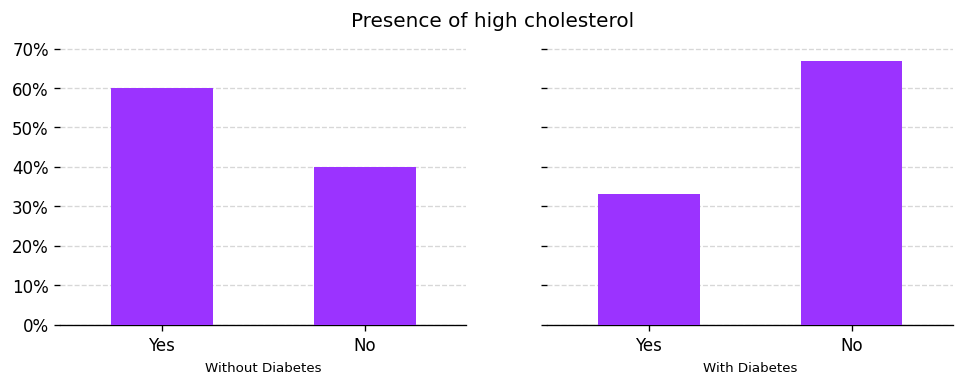

In [47]:
#High Cholesterol

colors=['#9B33FF']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Presence of high cholesterol')

(diabetes3[diabetes3['Diabetes_binary']==False]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["Yes", 'No'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['HighChol']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["Yes", 'No'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly higher cholesterol compared to those without the condition.

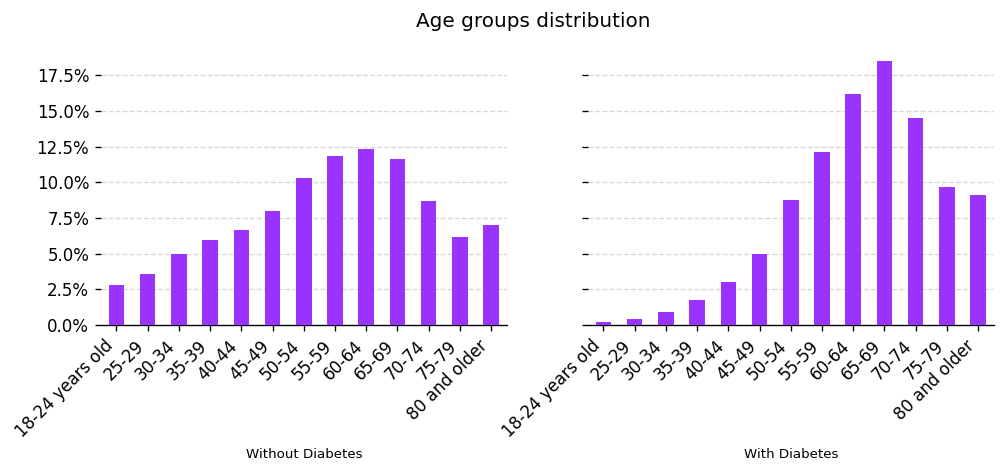

In [50]:
ratio = 3
colors= ['#9B33FF']
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=120, sharey=True)
fig.suptitle('Age groups distribution')
age_groups = ['18-24 years old', '25-29', '30-34',
              '35-39', '40-44', '45-49', '50-54',
              '55-59', '60-64', '65-69', '70-74',
              '75-79', '80 and older']


(diabetes3[diabetes3['Diabetes_binary']==False]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(age_groups)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

(diabetes3[diabetes3['Diabetes_binary']==True]['Age']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(age_groups)
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');

According to the analysis, there is a notable concentration of individuals diagnosed with Diabetes between the ages of 50 to 74 years, in contrast to those without the condition.

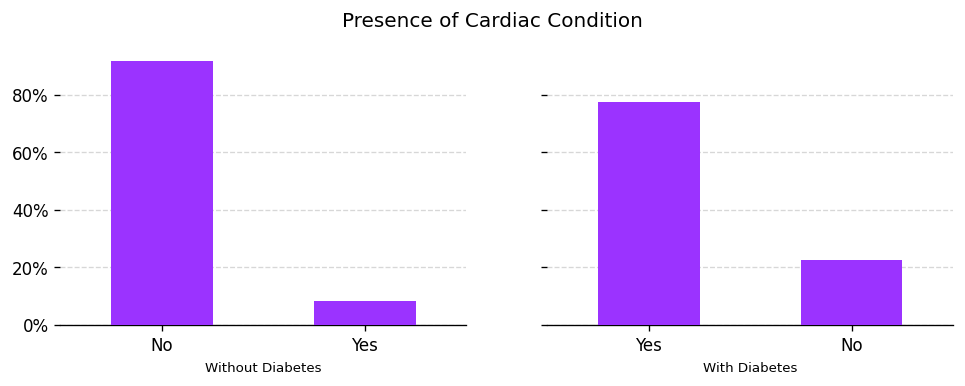

In [52]:
colors=['#9B33FF']
ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Presence of Cardiac Condition')

(diabetes3[diabetes3['Diabetes_binary']==False]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['HeartDiseaseorAttack']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["Yes", 'No'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The analysis of the dataset indicates that individuals diagnosed with Diabetes exhibit a significantly cardiac conditions increase compared to those without the diabetes condition.

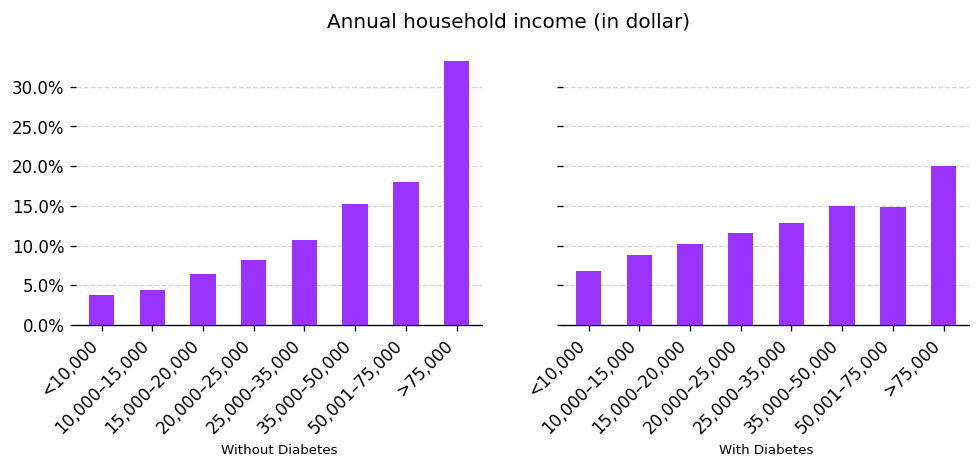

In [53]:
ratio = 3
colors=['#9B33FF']

fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio), dpi=120, sharey=True)
fig.suptitle('Annual household income (in dollar)')
income_groups = ['<10,000', '10,000–15,000', '15,000–20,000',
                 '20,000–25,000', '25,000–35,000', '35,000–50,000',
                 '50,001–75,000', '>75,000']

(diabetes3[diabetes3['Diabetes_binary']==False]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(income_groups)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)


(diabetes3[diabetes3['Diabetes_binary']==True]['Income']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(income_groups)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right');
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)

The MetaData explains patient Annual household income in dollar, where:

1 = <10,000
2 = 10,000–15,000
3 = 15,000–20,000
4 = 20,000–25,000
5 = 25,000–35,000
6 = 35,000–50,000
7 = 50,001–75,000
8 = >75,000

According to the analysis, there is a notable concentration of individuals diagnosed with Diabetes in the lower income tiers in contrast to those without the Diabetes.

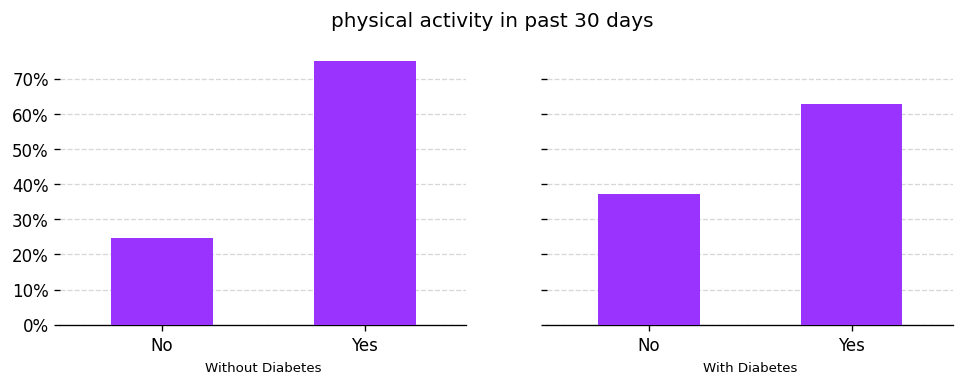

In [55]:
#Physical Activity

colors=['#9B33FF']

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('physical activity in past 30 days')

(diabetes3[diabetes3['Diabetes_binary']==False]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['PhysActivity']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

The dataset analysis indicates that there are more individuals diagnosed with diabetes who report lower levels of physical activity, compared to those without the condition.

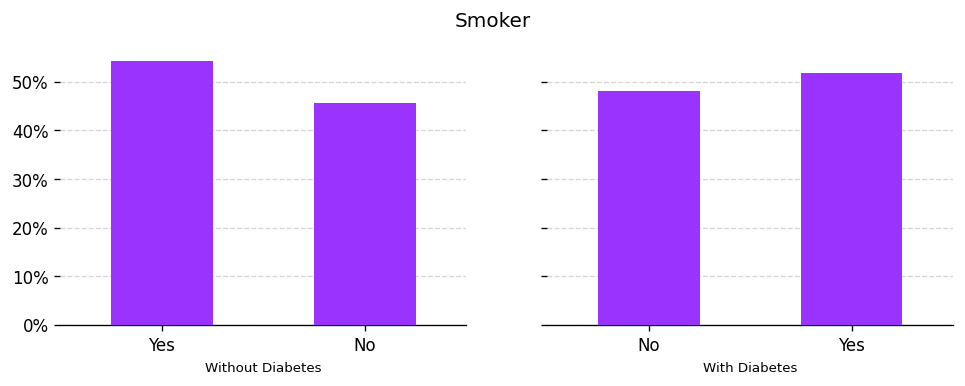

In [58]:
#Smoker

colors=['#9B33FF']

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Smoker')

(diabetes3[diabetes3['Diabetes_binary']==False]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["Yes", 'No'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['Smoker']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

Quite a higher number of smokers in the diabetes group.

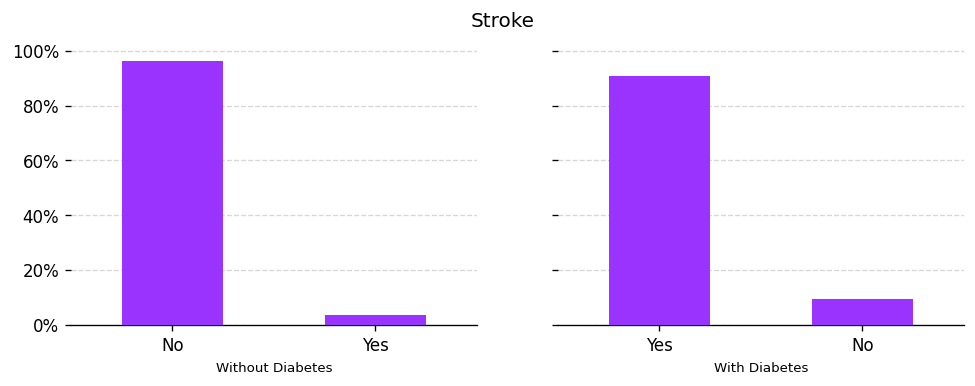

In [60]:
#Stroke

colors=['#9B33FF']

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Stroke')

(diabetes3[diabetes3['Diabetes_binary']==False]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['Stroke']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["Yes", 'No'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

There is a high tendency of stroke attack in the patients with diabetics group.

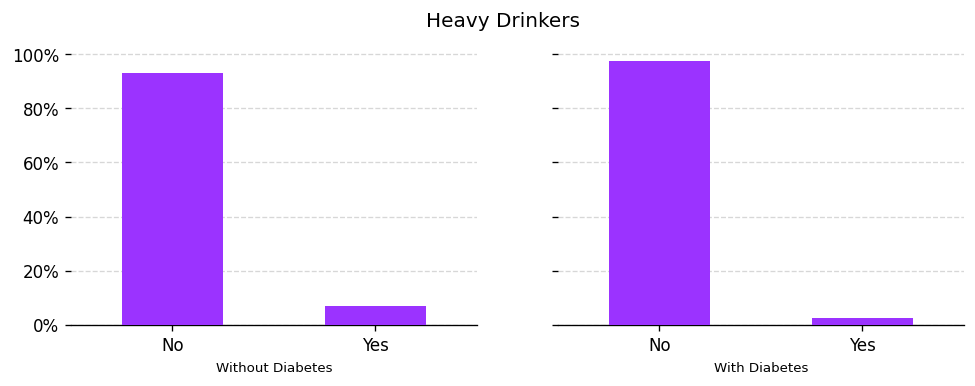

In [62]:
#Heavy Drinkers
colors=['#9B33FF']

ratio = 3
fig, (ax, ax2) = plt.subplots(1,2, figsize=(ratio*3.2,ratio),dpi=120, sharey=True)
fig.suptitle('Heavy Drinkers')

(diabetes3[diabetes3['Diabetes_binary']==False]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax,kind='bar', zorder=3, color=colors)).spines[['top','right', 'left']].set_visible(False)
ax.set_xlabel('Without Diabetes',size=8)
ax.set_xticklabels(["No", 'Yes'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

(diabetes3[diabetes3['Diabetes_binary']==True]['HvyAlcoholConsump']
 .value_counts(1)
 .sort_index()
 .plot(ax=ax2, kind='bar', zorder=3,color=colors)).spines[['top','right', 'left']].set_visible(False)
ax2.set_xlabel('With Diabetes',size=8)
ax2.set_xticklabels(["No", 'Yes'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax2.grid(axis='y', linestyle='--', alpha=.5)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=0);

We have less alcohol consumption in the Diabetic group. the consumption rate is measured as:
Adult Male > 14 drink in a week
Adult Female > 7 drink in a week